In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
digits = load_digits()
data = scale(digits.data)

def print_digits(images, y, max_n=10):
    # set up the figure size in inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1,
                       hspace=0.05, wspace=0.05)
    i = 0
    while i < max_n and i < images.shape[0]:
        # plot the images in a matrix of 20x20
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        # label the image with the target value
        p.text(0, -1, str(y[i]))
        i = i + 1

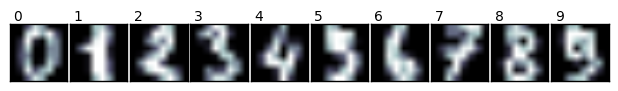

In [3]:
print_digits(digits.images, digits.target, max_n=10)

In [4]:
from sklearn.cross_validation import train_test_split
# python语句过长换行，可在后加"\"
X_train, X_test, y_train, y_test, images_train, images_test = \
train_test_split(data, digits.target, digits.images, test_size=0.25, random_state=42)
n_samples, n_features = X_train.shape
n_digits = len(np.unique(y_train))
labels = y_train

In [5]:
from sklearn import cluster
clf = cluster.KMeans(init='k-means++',
                    n_clusters=10, random_state=42)
clf.fit(X_train)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=42, tol=0.0001,
    verbose=0)

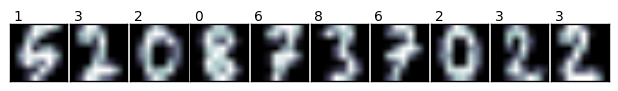

In [6]:
print_digits(images_train, clf.labels_, max_n=10)

In [7]:
y_pred = clf.predict(X_test)

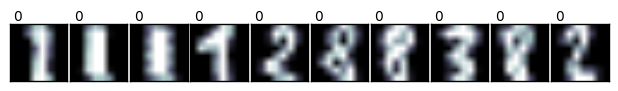

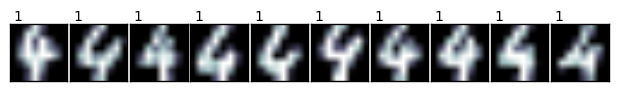

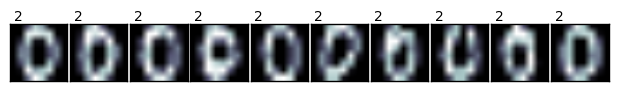

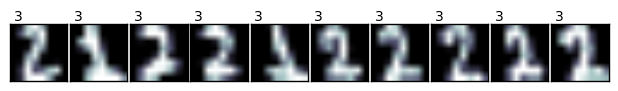

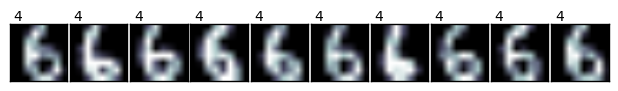

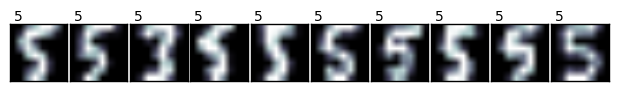

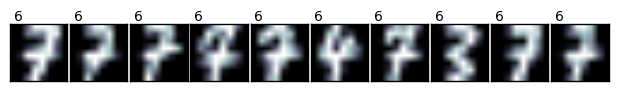

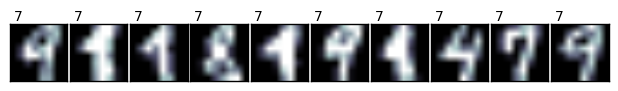

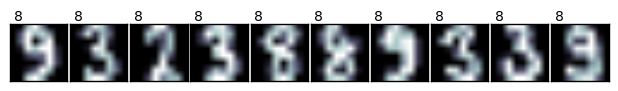

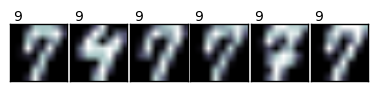

In [8]:
def print_cluster(images, y_pred, cluster_number):
    images = images[y_pred==cluster_number]
    y_pred = y_pred[y_pred==cluster_number]
    print_digits(images, y_pred, max_n=10)
for i in range(10):
    print_cluster(images_test, y_pred, i)

In [9]:
from sklearn import metrics
print("Ajusted rand score:{:.2}".format(
        metrics.adjusted_rand_score(y_test, y_pred)))

Ajusted rand score:0.57


In [10]:
print(metrics.confusion_matrix(y_test, y_pred))

[[ 0  0 43  0  0  0  0  0  0  0]
 [20  0  0  7  0  0  0 10  0  0]
 [ 5  0  0 31  0  0  0  1  1  0]
 [ 1  0  0  1  0  1  4  0 39  0]
 [ 1 50  0  0  0  0  1  2  0  1]
 [ 1  0  0  0  1 41  0  0 16  0]
 [ 0  0  1  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  1 34  1  0  5]
 [21  0  0  0  0  3  1  2 11  0]
 [ 0  0  0  0  0  2  3  3 40  0]]


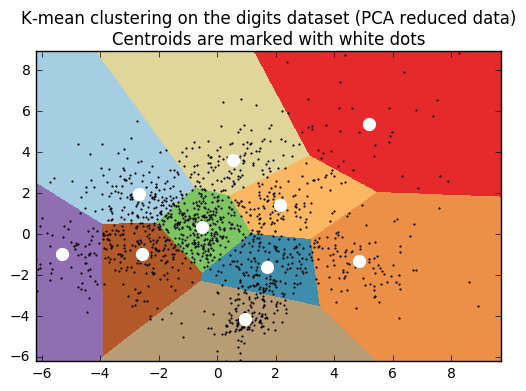

In [11]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2).fit(X_train)
reduced_X_train = pca.transform(X_train)
# step size of the mesh
h = .01
# point in the mesh [x_min, x_max]x[y_min, y_max]
x_min, x_max = reduced_X_train[:, 0].min() + 1,\
reduced_X_train[:, 0].max() - 1
y_min, y_max = reduced_X_train[:, 1].min() + 1,\
reduced_X_train[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
kmeans = cluster.KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_X_train)
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
# put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),\
           cmap=plt.cm.Paired, aspect='auto', origin='lower')
plt.plot(reduced_X_train[:, 0], reduced_X_train[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='.',
           s=169, linewidths=3, color='w', zorder=10)
plt.title("K-mean clustering on the digits dataset (PCA \
reduced data)\nCentroids are marked with white dots")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks()
plt.yticks()
plt.show()

In [12]:
aff = cluster.AffinityPropagation()
aff.fit(X_train)
print(aff.cluster_centers_indices_.shape)

(112,)


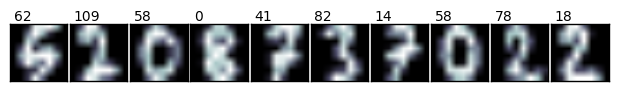

In [16]:
print_digits(images_train, aff.labels_, max_n=10)

In [19]:
ms = cluster.MeanShift()
ms.fit(X_train)
print(ms.cluster_centers_.shape)

(18, 64)


In [20]:
from sklearn import mixture
gm = mixture.GMM(n_components=n_digits, covariance_type='tied', random_state=42)
gm.fit(X_train)

GMM(covariance_type='tied', init_params='wmc', min_covar=0.001,
  n_components=10, n_init=1, n_iter=100, params='wmc', random_state=42,
  thresh=None, tol=0.001, verbose=0)

In [22]:
# print train clustering and confusion matrix
y_pred = gm.predict(X_test)
print("Adjust rand score: {:.2}".format(metrics.adjusted_rand_score(y_test, y_pred)))

Adjust rand score: 0.65


In [23]:
print("Homogeneity score: {:.2}".format(metrics.homogeneity_score(y_test, y_pred)))

Homogeneity score: 0.75


In [24]:
print("Completeness score: {:.2}".format(metrics.completeness_score(y_test, y_pred)))

Completeness score: 0.8
